# Question 1:
1. Use User Data set and show the accuracy through the SVM model.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
data=pd.read_csv('datasets/User_Data - Arindam Dev (1).csv')

In [3]:
data.shape

(400, 5)

In [4]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.Purchased.unique()

array([0, 1])

In [6]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


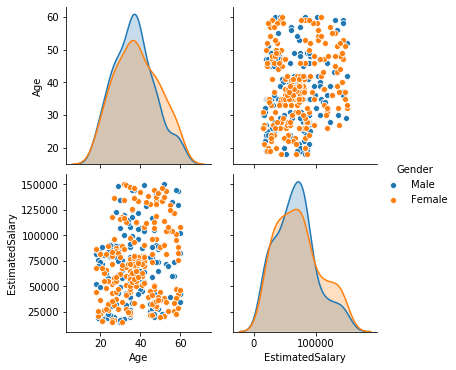

In [7]:
sns.pairplot(data[['Gender','Age','EstimatedSalary']],hue='Gender')

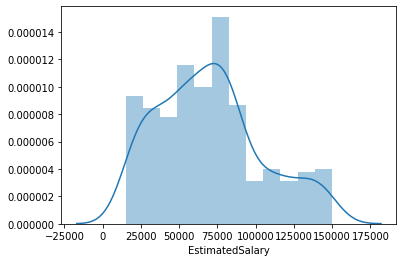

In [8]:
sns.distplot(data['EstimatedSalary'])

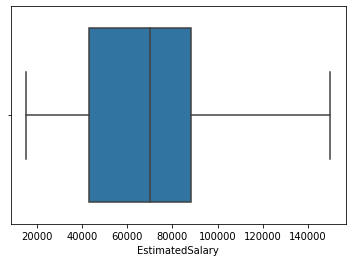

In [9]:
sns.boxplot(data['EstimatedSalary'])

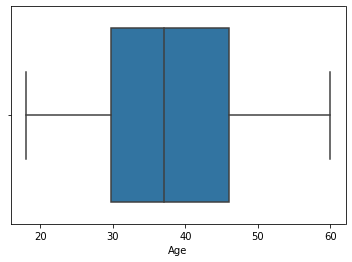

In [10]:
sns.boxplot(data['Age'])

In [30]:
x=data.iloc[:,2:4].values
y=data.iloc[:,-1:].values

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,train_size=0.8)

In [31]:
normal=StandardScaler()
xtrain=normal.fit_transform(xtrain)
xtest=normal.fit_transform(xtest)

In [32]:
svc_alg=SVC(kernel='linear',degree=8)

svc_alg.fit(xtrain,ytrain)

/home/yate/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
predict=svc_alg.predict(xtest)

In [34]:
accuracy=accuracy_score(ytest,predict)
print(f'accuracy: {accuracy}')

accuracy: 0.85


In [18]:
x1=normal.fit_transform(x)

In [ ]:
svc_alg.fit(x1,y)
predicts=svc_alg.predict(x1)

In [28]:
accuracys=accuracy_score(y,predicts)
print(f'accuracy: {accuracys}')

accuracy: 0.8425


In [29]:
Class=classification_report(y,predicts)
print(Class)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       257
           1       0.85      0.68      0.75       143

    accuracy                           0.84       400
   macro avg       0.85      0.81      0.82       400
weighted avg       0.84      0.84      0.84       400

